<a href="https://colab.research.google.com/github/sanjay7178/WeedsBostonTrain/blob/main/Boston_RESNET_final_notebook_submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.applications.vgg16 import VGG16
# resnet 50
from keras.applications.resnet import ResNet50
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from matplotlib import pyplot as plt
import numpy as np

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [125]:
!cp '/content/drive/MyDrive/resent weed detection/colab/Student Projects.zip' .

In [124]:
!rm -rf 'Student Projects'

In [126]:
!unzip '/content/Student Projects.zip'

Archive:  /content/Student Projects.zip
   creating: Student Projects/
   creating: Student Projects/CELOSIA ARGENTEA L/
  inflating: Student Projects/CELOSIA ARGENTEA L/138.jpg  
  inflating: Student Projects/CELOSIA ARGENTEA L/150.jpg  
  inflating: Student Projects/CELOSIA ARGENTEA L/239.jpg  
  inflating: Student Projects/CELOSIA ARGENTEA L/247.jpg  
  inflating: Student Projects/CELOSIA ARGENTEA L/316.jpg  
  inflating: Student Projects/CELOSIA ARGENTEA L/318.jpg  
  inflating: Student Projects/CELOSIA ARGENTEA L/35.jpg  
  inflating: Student Projects/CELOSIA ARGENTEA L/388.jpg  
  inflating: Student Projects/CELOSIA ARGENTEA L/409.jpg  
  inflating: Student Projects/CELOSIA ARGENTEA L/410.jpg  
  inflating: Student Projects/CELOSIA ARGENTEA L/412.jpg  
  inflating: Student Projects/CELOSIA ARGENTEA L/424.jpg  
  inflating: Student Projects/CELOSIA ARGENTEA L/47.jpg  
  inflating: Student Projects/CELOSIA ARGENTEA L/488.jpg  
  inflating: Student Projects/CELOSIA ARGENTEA L/516.jp

In [49]:
!pwd

/content


visualizing data
generate dataset for training

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
!pip install  split-folders


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [127]:
import splitfolders
splitfolders.ratio("Student Projects", output="output8",
    seed=1337, ratio=(.7, .2,.1), group_prefix=None, move=False) # default values

Copying files: 342 files [00:00, 2816.12 files/s]


In [4]:
image_size = [224, 224, 3] # fix image size

In [4]:
!ls

 drive	       output4	     output8		'Student Projects (2).zip'
 output        output4.zip   output.zip		'Student Projects.zip'
 output1       output5	     sample_data
 output1.zip   output7	    'Student Projects'


In [5]:
train_dir = 'output8/train' #training dataset folder
val_dir = 'output8/val' #testing dataset folder

In [6]:
train_data_gen = ImageDataGenerator(rescale=1. / 225)
val_data_gen = ImageDataGenerator(rescale=1. / 225 )

##Augmentation

In [10]:
train_data_gen = ImageDataGenerator(
    rotation_range=20,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
val_data_gen  = ImageDataGenerator(
    rotation_range=20,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [11]:
train_data = train_data_gen.flow_from_directory(train_dir, target_size=(120,120), class_mode='categorical', batch_size=64)
val_data = val_data_gen.flow_from_directory(val_dir, target_size=(120,120), class_mode='categorical', batch_size=64)

Found 238 images belonging to 3 classes.
Found 67 images belonging to 3 classes.


building deep learning model using pre trained weights 

In [12]:
from keras.applications.mobilenet_v2 import MobileNetV2
# from tensorflow.keras.applications import EfficientNetB0

In [13]:
mbnet = MobileNetV2(include_top=False, weights='imagenet', input_shape=(224,224,3))


In [15]:
mbnet.trainable=True
for layer in mbnet.layers:
    layer.trainable = False

In [16]:
mbnet.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [17]:
from keras.layers import Dense, GlobalAveragePooling2D, Flatten

In [18]:
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization, Dropout , GlobalAveragePooling2D

In [19]:
model = Sequential([
    mbnet,
    GlobalAveragePooling2D(),
    Dense(200, activation='relu'),
     BatchNormalization(),
    Dense(3, activation='softmax')

    # GlobalAveragePooling2D(),
    # BatchNormalization(),
    # Dense(256,activation='relu'),
    # BatchNormalization(),
    # Dense(200,activation='relu'),
    # BatchNormalization(),
    # Dense(3,activation='softmax')
])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 200)               256200    
                                                                 
 batch_normalization (BatchN  (None, 200)              800       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 3)                 603       
                                                        

In [22]:
from keras.optimizers import Adam

In [23]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    # optimizer ='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [103]:
from PIL import Image


In [24]:
history = model.fit(
    train_data, 
    validation_data=val_data, 
    epochs=40,
    batch_size=128, 
)

Epoch 1/40
4/4 [==============================] - 12s 2s/step - loss: 1.1787 - accuracy: 0.5714 - val_loss: 0.7174 - val_accuracy: 0.7015
Epoch 2/40
4/4 [==============================] - 4s 993ms/step - loss: 0.4568 - accuracy: 0.8109 - val_loss: 0.4989 - val_accuracy: 0.8060
Epoch 3/40
4/4 [==============================] - 4s 983ms/step - loss: 0.2995 - accuracy: 0.8908 - val_loss: 0.7589 - val_accuracy: 0.7612
Epoch 4/40
4/4 [==============================] - 5s 1s/step - loss: 0.2619 - accuracy: 0.9034 - val_loss: 0.5993 - val_accuracy: 0.7910
Epoch 5/40
4/4 [==============================] - 4s 1s/step - loss: 0.2800 - accuracy: 0.8824 - val_loss: 0.6411 - val_accuracy: 0.7910
Epoch 6/40
4/4 [==============================] - 4s 949ms/step - loss: 0.2130 - accuracy: 0.9160 - val_loss: 0.6163 - val_accuracy: 0.8060
Epoch 7/40
4/4 [==============================] - 4s 1s/step - loss: 0.1636 - accuracy: 0.9328 - val_loss: 0.7555 - val_accuracy: 0.7761
Epoch 8/40
4/4 [===============

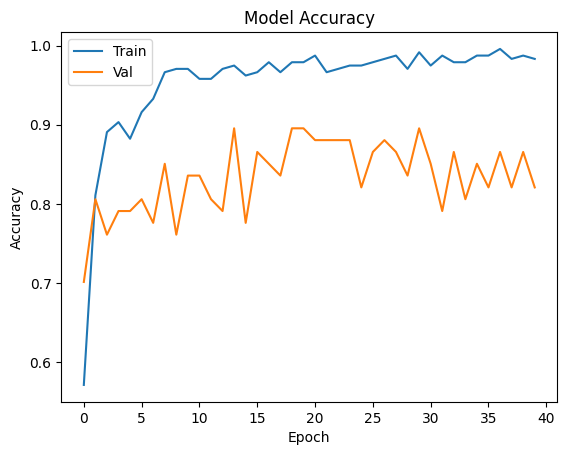

In [25]:
# draw graph for train and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

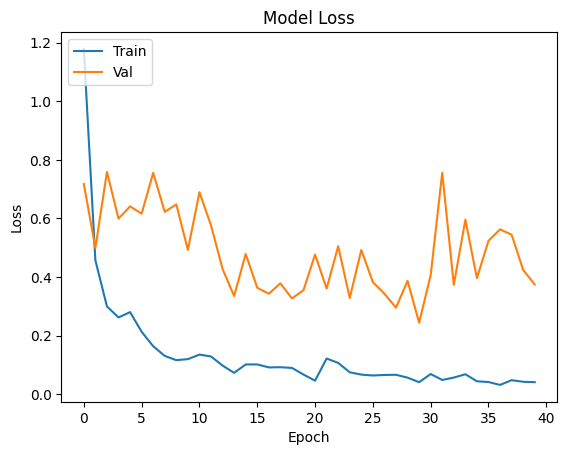

In [26]:
# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [27]:
import sys
from PIL import Image
sys.modules['Image'] = Image

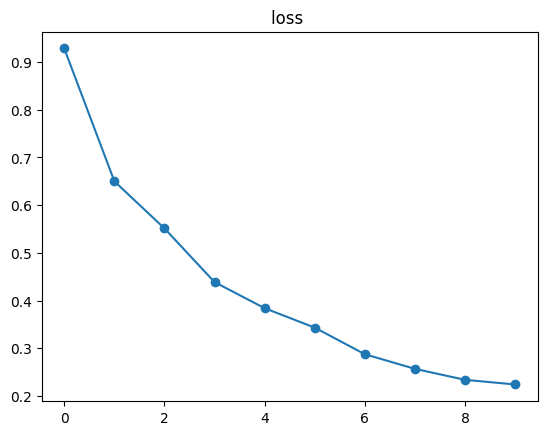

In [ ]:
plt.title('loss ')
plt.plot(history.history['loss'], marker='o')

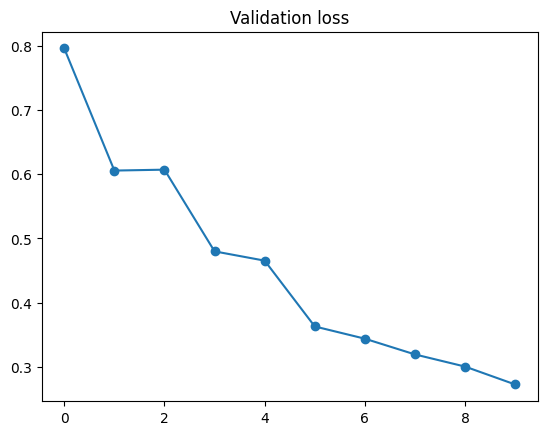

In [ ]:
plt.title('Validation loss')
plt.plot(history.history['val_loss'], marker = 'o')

building a custom deep learning model 

In [28]:
model.save('mbnet_epochs_40.h5')